# WEEK6 실전 분석
## 숫자 손글씨 분류하기
DATA SET by MNIST http://yann.lecun.com/exdb/mnist/

---

## 문제 정의
28x28 픽셀의 손글씨 숫자 이미지를 입력받아 실제로 의미하는 숫자를 인식한다.

## 가설 수립
28x28 픽셀 데이터, 즉 784종의 특징 데이터를 구성한 후 머신러닝을 통해 실제로 어떤 숫자인지 추측할 수 있다.

## 목표
28x28 사이즈의 숫자 손글씨 이미지로 부터 label값을 얻어낸다.

---
## 데이터 구성

**784개 입력 데이터** 28x28 픽셀이므로 총 784칸의 픽셀 값 정보  
**출력 데이터** label(어떤 숫자인가?)  
**개수** 10,000개

## 데이터 다운로드
[데이터 다운로드](http://naver.com)
-교육적 의도로 기존 DATA에서 일부 변형되었습니다.

---
# 분석 가이드
### [단계1. 데이터 불러오기](#1.-데이터-불러오기)
### [단계2. EDA & Feature Engineering](#2.-EDA-&-Feature-Engineering)
### [단계3. Dataset 구성하기](#3.-Dataset-구성하기)
### [단계4. 모델링과 학습](#4.-모델링과-학습)
### [단계5. 모델 검증](#5.-모델-검증)

---
# 1. 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/digit.csv')
df.head()

,"pixel 1,1","pixel 1,2","pixel 1,3","pixel 1,4","pixel 1,5","pixel 1,6","pixel 1,7","pixel 1,8","pixel 1,9","pixel 1,10",...,"pixel 28,20","pixel 28,21","pixel 28,22","pixel 28,23","pixel 28,24","pixel 28,25","pixel 28,26","pixel 28,27","pixel 28,28",label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


---
# 2. EDA & Feature Engineering

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [4]:
df.describe()

,"pixel 1,1","pixel 1,2","pixel 1,3","pixel 1,4","pixel 1,5","pixel 1,6","pixel 1,7","pixel 1,8","pixel 1,9","pixel 1,10",...,"pixel 28,20","pixel 28,21","pixel 28,22","pixel 28,23","pixel 28,24","pixel 28,25","pixel 28,26","pixel 28,27","pixel 28,28",label
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000480,0.000239,0.000050,0.000025,0.0,0.0,0.0,0.0,0.0,4.453400
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.017804,0.013588,0.003535,0.002500,0.0,0.0,0.0,0.0,0.0,2.884451
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.988281,0.988281,0.250000,0.250000,0.0,0.0,0.0,0.0,0.0,9.000000


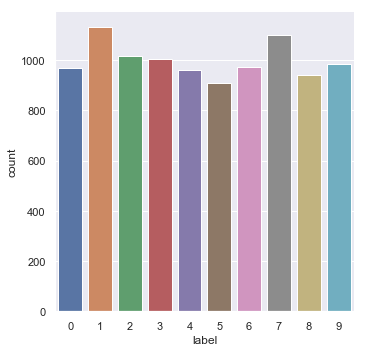

In [5]:
sns.catplot(data=df, x='label', kind='count')

### 이미지 살펴보기

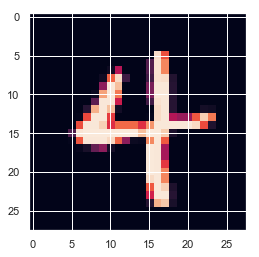

In [6]:
numbers = df.drop(['label'], axis=1)

nth = 0 # 0 ~ 9999까지 바꾸면서 살펴보세요
img = np.reshape(numbers.iloc[nth].values, [28, 28])
plt.imshow(img)
plt.show()

---
# 3. Dataset 구성하기

In [7]:
train_data = df.drop('label', axis=1)
target_data = df['label']

print(train_data.shape, target_data.shape)

(10000, 784) (10000,)


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2) 

print(train_data.shape, x_train.shape, x_test.shape)

(10000, 784) (8000, 784) (2000, 784)


---
# 4. 모델링과 학습

In [9]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)

In [10]:
# train 데이터 학습
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
print('training set accuracy:', forest.score(x_train, y_train))

training set accuracy: 1.0


# 5. 모델 검증

In [12]:
print('test set accuracy:', forest.score(x_test, y_test)) # 인식정확도 출력

test set accuracy: 0.9535


### 실제 예측 결과물 살펴보기

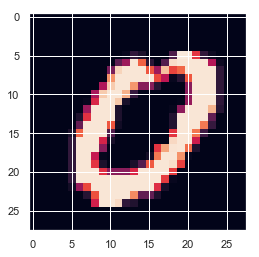

인식된 숫자는 0 입니다.


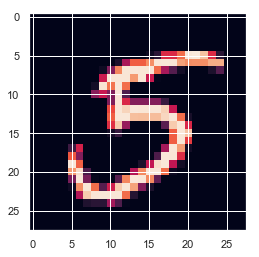

인식된 숫자는 5 입니다.


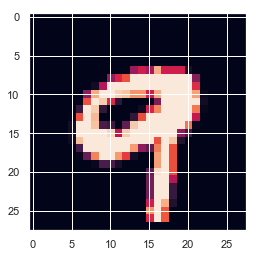

인식된 숫자는 9 입니다.


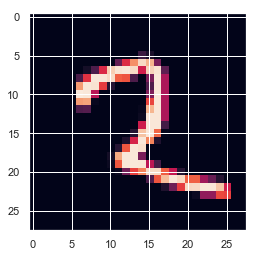

인식된 숫자는 2 입니다.


In [15]:
# random으로 픽하기
import random
for i in range(4):
    n = random.randrange(0, len(x_test))

    img = np.reshape(x_test.iloc[n].values, [28, 28])
    plt.imshow(img)
    plt.show()
    
    result = forest.predict([x_test.iloc[n].values])[0]
    print("인식된 숫자는", result, "입니다.")

---
# Challenge - Support Vector Machine 사용해보기
## SVR

In [14]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)

print('training set accuracy:', model.score(x_train, y_train))
print('test set accuracy:', model.score(x_test, y_test))

/Volumes/External1/Envs/Conda/ds/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


training set accuracy: 0.9225
test set accuracy: 0.916
